In [1]:
#importing libraries
import pandas as pd                               
import matplotlib.pyplot as plt                   
import seaborn as sB                              
import numpy as np   
import csv
import math    
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
#loading in data
df2=pd.read_csv("D:\code\School\D207\medical_clean.csv")

In [2]:
from platform import python_version
python_version()

'3.7.4'

In [3]:
df = df2.copy()
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
df.dtypes

CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain  

In [5]:
#removing any duplicates
df= df.drop_duplicates(['Interaction', 'UID'])

In [6]:
#dropping columns not used in analysis
df = df.drop([ 'CaseOrder', 'State', 'Customer_id', 'Interaction', 'UID', 'City', 'County', 'Zip',
             'Lat', 'Lng', 'TimeZone', 'Job', 'Full_meals_eaten', 'vitD_supp', 'Item1', 'Item2',
             'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Population',
             'Services', 'Children', 'Income', 'Additional_charges', 
             'TotalCharge'], axis =1)

In [7]:
#visualizing correlation between variables
df.corr()

,Age,VitD_levels,Doc_visits,Initial_days
Age,1.000000,0.010315,0.006898,0.016264
VitD_levels,0.010315,1.000000,0.010210,-0.003642
Doc_visits,0.006898,0.010210,1.000000,-0.006754
Initial_days,0.016264,-0.003642,-0.006754,1.000000


In [8]:
#inspecting data types 
df.dtypes

Area                   object
Age                     int64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety                object
Allergic_rhinitis      object
Reflux_esophagitis     object
Asthma                 object
Initial_days          float64
dtype: object

In [9]:
#no changes necessary

In [10]:
#checking summary statistics to look for outliers
df.describe()

,Age,VitD_levels,Doc_visits,Initial_days
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,17.964262,5.012200,34.455299
std,20.638538,2.017231,1.045734,26.309341
min,18.000000,9.806483,1.000000,1.001981
25%,36.000000,16.626439,4.000000,7.896215
50%,53.000000,17.951122,5.000000,35.836244
75%,71.000000,19.347963,6.000000,61.161020
max,89.000000,26.394449,9.000000,71.981490


In [11]:
#calculating IQR
age_IQR = (71- 36) * 1.5
print(age_IQR)
#calculating max and min to remove outliers
age_min = 36 - 52.5 
age_max = 71 + 52.5
print(age_min, age_max)

52.5
-16.5 123.5


In [12]:
#calculating IQR
vitD_IQR = (19.35 - 16.63) * 1.5
print(vitD_IQR)
#calculating max and min to remove outliers
vitD_min = 16.63 - 4.08
vitD_max = 19.35 + 4.08
print(vitD_min, vitD_max)
#removing outliers 
df = df.loc[df["VitD_levels"] > 12.55]
df = df.loc[df["VitD_levels"] < 23.43]
len(df)

4.080000000000004
12.549999999999999 23.43


9939

In [13]:
#calculating IQR and max and min
Doc_visits_IQR = 6 - 4
Doc_visits_min = 4 - 2
Doc_visits_max = 6 + 2
print(Doc_visits_min, Doc_visits_max)#removing outliers 
df = df.loc[df["Doc_visits"] > 2]
df = df.loc[df["Doc_visits"] < 8]
len(df)

2 8


9813

In [14]:
#calculating IQR
Initial_days_IQR = 61.16 - 7.89
print(Initial_days_IQR)
#calculating max and min to remove outliers
Initial_days_min = 7.89 - 53.27
Initial_days_max = 61.16 + 53.27
print(Initial_days_min, Initial_days_max)

53.269999999999996
-45.38 114.43


In [15]:
#calculating IQR
Total_charge_IQR = 7459.7 - 3179.37
print(Total_charge_IQR)
#calculating max and min to remove outliers
Total_charge_min = 3179.37 - 4280.33
Total_charge_max = 7459.7 + 4280.33
print(Total_charge_min, Total_charge_max)

4280.33
-1100.96 11740.029999999999


In [16]:
#calculating IQR
Additional_charges_IQR = 15626.49 - 7986.49
print(Additional_charges_IQR)
#calculating max and min to remove outliers
Additional_charges_min  = 7986.49 - 7640.0
Additional_charges_max  = 15626.49 + 7640.0
print(Additional_charges_min, Additional_charges_max)

7640.0
346.4899999999998 23266.489999999998


In [17]:
#getting dummies for categorical variables
df = pd.get_dummies(df)
df.head()

,Age,VitD_levels,Doc_visits,Initial_days,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,...,BackPain_No,BackPain_Yes,Anxiety_No,Anxiety_Yes,Allergic_rhinitis_No,Allergic_rhinitis_Yes,Reflux_esophagitis_No,Reflux_esophagitis_Yes,Asthma_No,Asthma_Yes
0,53,19.141466,6,10.585770,0,1,0,1,0,0,...,0,1,0,1,0,1,1,0,0,1
1,51,18.940352,4,15.129562,0,0,1,0,1,0,...,1,0,1,0,1,0,0,1,1,0
2,53,18.057507,4,4.772177,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,78,16.576858,4,1.714879,0,1,0,0,1,0,...,1,0,1,0,1,0,0,1,0,1
4,22,17.439069,5,1.254807,1,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0


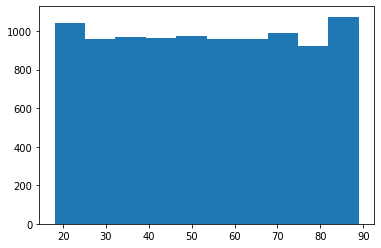

In [18]:
#viewing distribution of age
plt.hist(df['Age'])
plt.show()

(array([6210.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3603.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

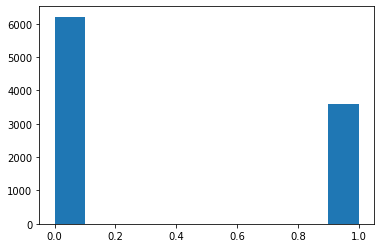

In [19]:
#viewing counts of patients that were readmitted within 30
#days of discharge
plt.hist(df['ReAdmis_Yes'])

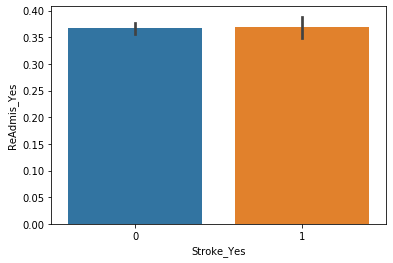

In [20]:
#viewing stroke status and readmission
sB.barplot(df['Stroke_Yes'], df['ReAdmis_Yes'])

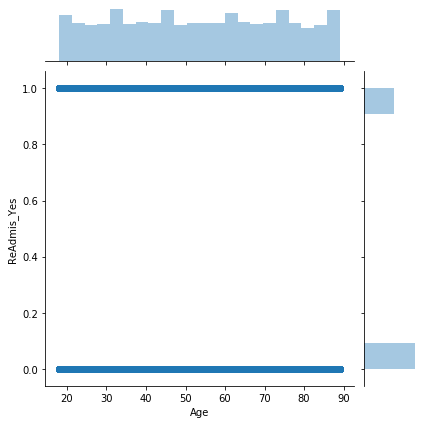

In [21]:
#viewing age and readmission count
sB.jointplot(df['Age'], df['ReAdmis_Yes'])

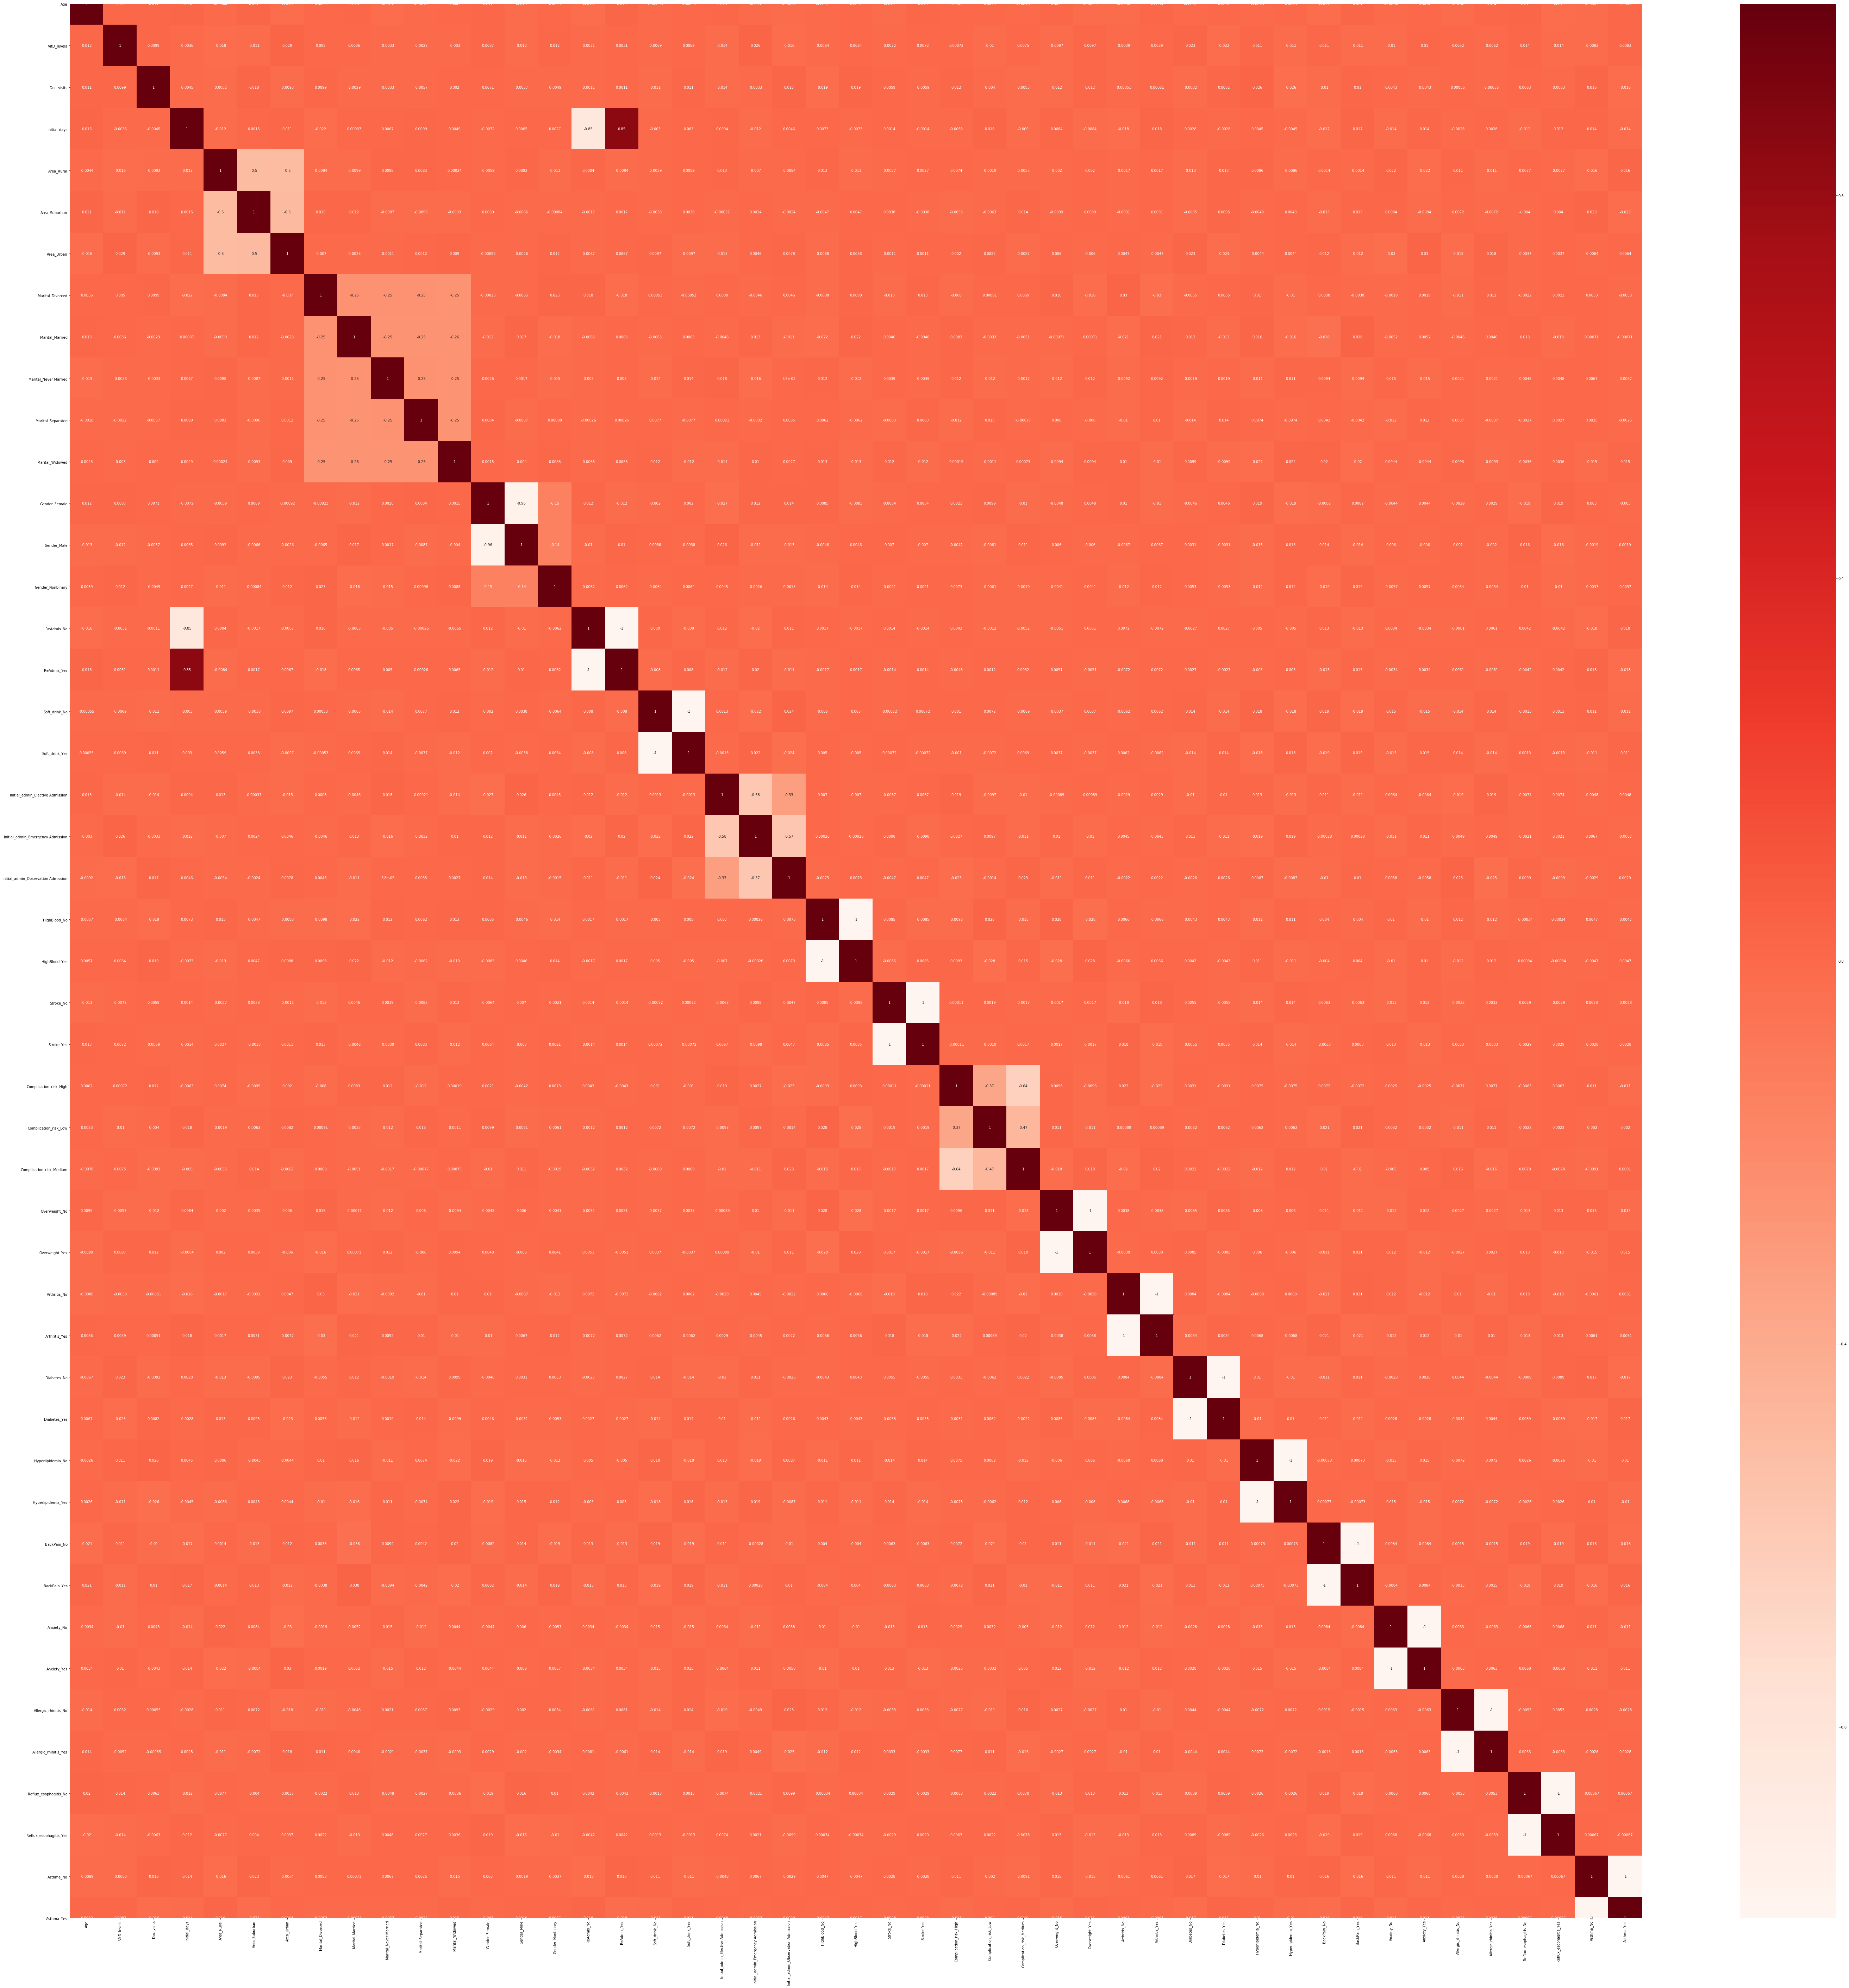

In [22]:
##Visualizing correlations
plt.figure(figsize=(100,100))
cor = df.corr()
sB.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [23]:
#writing to csv
df.to_csv('medical_prepared.csv')

# Part  IV: Model Comparison

In [24]:
X = df[['Diabetes_Yes', 'VitD_levels', 'Doc_visits', 'HighBlood_Yes', 
        'Initial_admin_Emergency Admission', 'HighBlood_Yes', 'Soft_drink_Yes', 
        'Complication_risk_High', 'Overweight_Yes', 'Stroke_Yes', 'Arthritis_Yes', 
        'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 
        'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Initial_days', 'Area_Urban', 'Area_Rural', 
        'Marital_Married', 'Marital_Never Married', 'Age', ]]

In [25]:
#adding constant to find intercept
X = sm.add_constant(X)

C:\Users\jack\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
#declaring dependent variable
Y = df[['ReAdmis_Yes']] 

In [27]:
#changing data types to array
X = np.array(X)
Y = np.array(Y)

In [28]:
#creating logistic regression model
logit_model = sm.Logit(Y, X)
result = logit_model.fit()
print(result.summary())

C:\Users\jack\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\jack\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: inf
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 9813
Model:                          Logit   Df Residuals:                     9790
Method:                           MLE   Df Model:                           22
Date:                Wed, 21 Jul 2021   Pseudo R-squ.:                     inf
Time:                        10:39:38   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -71.8301      3.911    -18.368      0.000     -79.495     -64.166
x1             0.4219      0.215 

C:\Users\jack\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jack\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\jack\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\jack\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\jack\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [29]:
#making predictions
lr = LogisticRegression(random_state=0).fit(X, Y)
predictions = [ ]
predictions = lr.predict(X)
print(predictions)

[0 0 0 ... 1 1 1]


C:\Users\jack\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jack\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
#evaluating model
mean_squared_error(predictions, Y)

0.020890655253235503

In [31]:
#getting accuracy score 
print("Accuracy:", metrics.accuracy_score(predictions, Y))

Accuracy: 0.9791093447467645


In [32]:
print(classification_report(predictions, Y))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6145
           1       0.98      0.96      0.97      3668

    accuracy                           0.98      9813
   macro avg       0.98      0.98      0.98      9813
weighted avg       0.98      0.98      0.98      9813



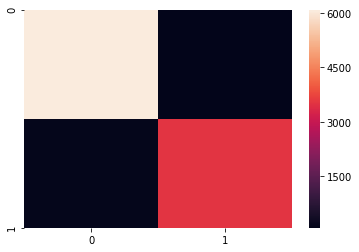

In [33]:
#creating plot of confusion matrix
confusion_matrix = metrics.confusion_matrix(predictions, Y)
sB.heatmap(pd.DataFrame(confusion_matrix))

# Creating reduced model

In [34]:
X = df[['Diabetes_Yes', 'Initial_admin_Emergency Admission', 'Complication_risk_High',  'Stroke_Yes', 
        'Arthritis_Yes', 'Anxiety_Yes', 'Asthma_Yes', 'Initial_days']]

In [35]:
Y = df['ReAdmis_Yes']

In [36]:
logit_model = sm.Logit(Y, X)
result = logit_model.fit()
print(result.summary2())

C:\Users\jack\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\jack\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                                  Results: Logit
Model:                     Logit                   Pseudo R-squared:        inf   
Dependent Variable:        ReAdmis_Yes             AIC:                     inf   
Date:                      2021-07-21 10:39        BIC:                     inf   
No. Observations:          9813                    Log-Likelihood:          -inf  
Df Model:                  7                       LL-Null:                 0.0000
Df Residuals:              9805                    LLR p-value:             1.0000
Converged:                 1.0000                  Scale:                   1.0000
No. Iterations:            7.0000                                                 
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------

C:\Users\jack\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [37]:
#creating a list with predicted values
lm = linear_model.LogisticRegression()
model = lm.fit(X, Y)
predictions = [ ]
predictions = lm.predict(X)
print(predictions)

[0 0 0 ... 1 1 1]


C:\Users\jack\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
#creating list with actual values
readmis_list = df['ReAdmis_Yes']

In [39]:
#evaluating reduced model
mean_squared_error(predictions, readmis_list)

0.01915825945174768

In [40]:
#getting accuracy score for reduced model
print("Accuracy:", metrics.accuracy_score(predictions, readmis_list))

Accuracy: 0.9808417405482523


In [41]:
print(classification_report(predictions, readmis_list))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6106
           1       0.99      0.96      0.97      3707

    accuracy                           0.98      9813
   macro avg       0.98      0.98      0.98      9813
weighted avg       0.98      0.98      0.98      9813



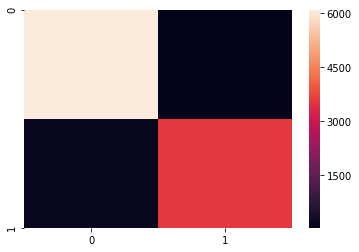

In [42]:
#creating plot of confusion matrix for reduced model
confusion_matrix = metrics.confusion_matrix(predictions, readmis_list)
sB.heatmap(pd.DataFrame(confusion_matrix))